<a href="https://colab.research.google.com/github/sseyler0119/Data-Science-Projects/blob/master/T_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

import researchpy as rp
from scipy import stats

In [3]:
bike_sharing_data = pd.read_csv('https://raw.githubusercontent.com/sseyler0119/datasets/master/day.csv') # import bike data set
bike_sharing_data.shape

(731, 16)

In [4]:
bike_sharing_data.head() # view first few rows of data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# extract columns from dataset
bike_sharing_data = bike_sharing_data[['season',
                                       'mnth',
                                       'holiday', 
                                       'workingday',
                                       'weathersit',
                                       'temp', 
                                       'cnt']]

In [6]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [7]:
bike_sharing_data['season'].unique() # display number of unique values in season columns 
# 1: Spring
# 2: Summer
# 3: Fall
# 4: Winter

array([1, 2, 3, 4])

In [8]:
bike_sharing_data['workingday'].unique() 

array([0, 1])

In [9]:
bike_sharing_data['holiday'].unique()

array([0, 1])

In [10]:
bike_sharing_data['weathersit'].unique() # unique values for weather situation
# 1: Clear, few clouds
# 2: Misty, cloudy
# 3: Light snow, rain, thunderstorm

array([2, 1, 3])

In [11]:
bike_sharing_data['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [12]:
bike_sharing_data.shape

(731, 7)

Use T-test

In [13]:
bike_sharing_data.groupby('workingday')['cnt'].describe() # view average number of bikes rented on working day vs non-working day

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


Is the difference in means significant?

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


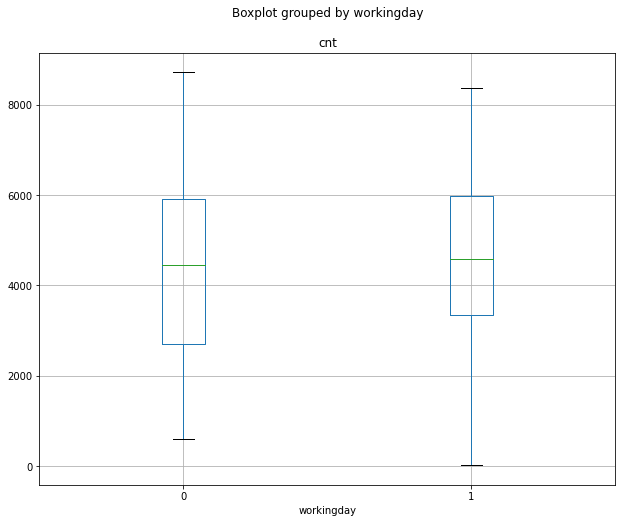

In [14]:
bike_sharing_data.boxplot(column=['cnt'], by='workingday', figsize=(10,8))

In [15]:
# split the data to prepare for T-test
sample_01 = bike_sharing_data[(bike_sharing_data['workingday'] == 1)]
sample_02 = bike_sharing_data[(bike_sharing_data['workingday'] == 0)]

In [16]:
sample_01.shape, sample_02.shape # unevern number of rows

((500, 7), (231, 7))

In [17]:
sample_01 = sample_01.sample(231) # take sample of 231 from sample_01 to even out rows
sample_01.shape, sample_02.shape

((231, 7), (231, 7))

Use Levene's test to check whether the variance of the two groups are the same

In [18]:
stats.levene(sample_01['cnt'], sample_02['cnt']) # p-value > 0.05, so we reject the alternative hypothesis and accept the null hypothesis
# the variances between the two samples are not significantly different

LeveneResult(statistic=3.688142161146931, pvalue=0.05541855278741174)

Check to see if the distribution of the residuals between the two groups follows the normal distribution

(array([ 3., 10., 22., 29., 39., 42., 35., 33., 14.,  4.]),
 array([-2.61897801, -2.1202753 , -1.62157259, -1.12286988, -0.62416717,
        -0.12546446,  0.37323825,  0.87194095,  1.37064366,  1.86934637,
         2.36804908]),
 <a list of 10 Patch objects>)

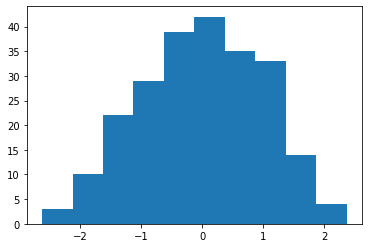

In [19]:
diff = scale(np.array(sample_01['cnt']) - np.array(sample_02['cnt'], dtype=float)) # np.float is deprecated, use float instead
plt.hist(diff)

Generate a probability plot of sample data against he quantiles of a theoretical distribution

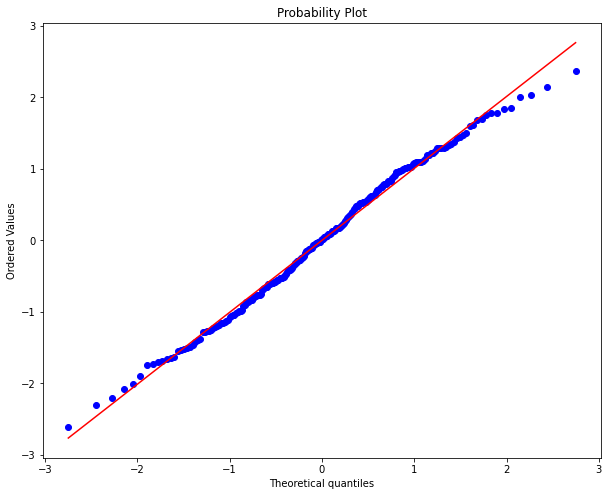

In [20]:
plt.figure(figsize=(10,8))
stats.probplot(diff, plot=plt, dist='norm')
plt.show()
# This is a relatively good fit, but it starts to deviate from the line around 2 standard deviations away from the mean on either side

Shapiro-Wilk test for normality - if the test statistic is **not** significant than population is normally distributed

In [21]:
stats.shapiro(diff) # p-value is 33%, so the shapiro test is not significant and the data is normally distributed

ShapiroResult(statistic=0.992075502872467, pvalue=0.24834772944450378)

Perform the T-Test

In [22]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt']) # p-value is almost 20%, so we reject the alternative hypothesis and accept the null hypothesis


Ttest_indResult(statistic=1.3880553423194986, pvalue=0.16579208477937607)

The null hypothesis says there is no difference in the means between these two groups.


*   Whether it is a working day or not has no affect on the number of bikes shared 



In [23]:
descriptives, results = rp.ttest(sample_01['cnt'], sample_02['cnt']) # returns summary statistics and t-test results using researchpy library

In [24]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,231.0,4584.891775,1888.891025,124.279905,4340.019129,4829.764421
1,cnt,231.0,4330.168831,2052.141245,135.020981,4064.132702,4596.204960
2,combined,462.0,4457.530303,1974.187257,91.847504,4277.038641,4638.021965


In [25]:
print(results) # p-value close to 20%, confirms results from previous test

          Independent t-test   results
0  Difference (cnt - cnt) =   254.7229
1      Degrees of freedom =   460.0000
2                       t =     1.3881
3   Two side test p value =     0.1658
4  Difference < 0 p value =     0.9171
5  Difference > 0 p value =     0.0829
6               Cohen's d =     0.1292
7               Hedge's g =     0.1289
8          Glass's delta1 =     0.1349
9        Point-Biserial r =     0.0646


Workday has no affect on the number of bikes, rented, but what about temperature?

In [26]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


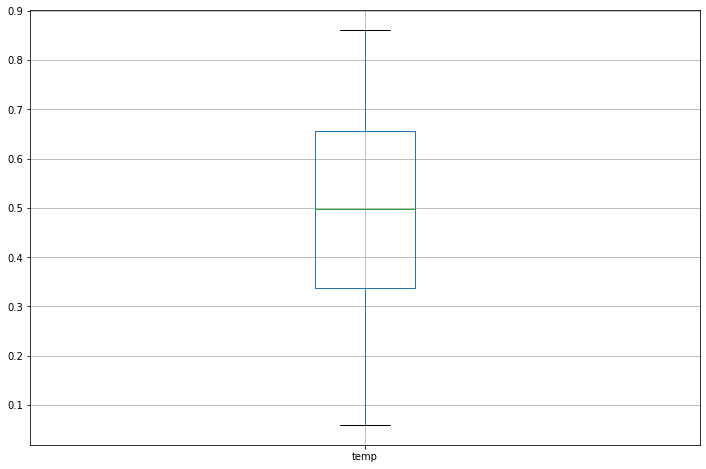

In [27]:
bike_sharing_data[['temp']].boxplot(figsize=(12,8)) # examine temperature distribution

In [28]:
# split temperature data into two groups (above and below average)
bike_sharing_data['temp_category'] = \
bike_sharing_data['temp'] > bike_sharing_data['temp'].mean()

In [29]:
bike_sharing_data.sample(10) # examine sample of data

,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_category
245,3,9,0,0,1,0.669167,4484,True
250,3,9,0,1,3,0.633913,1842,True
389,1,1,0,1,1,0.294167,4270,False
463,2,4,0,0,1,0.500000,5169,True
14,1,1,0,0,2,0.233333,1248,False
598,3,8,0,1,1,0.649167,7006,True
306,4,11,0,1,1,0.408333,3974,False
38,1,2,0,1,1,0.220833,1530,False
96,2,4,0,1,1,0.437500,3141,False
293,4,10,0,1,1,0.427500,4304,False


In [30]:
# use new temp_category to compare data between the two groups
bike_sharing_data.groupby('temp_category')['cnt'].describe()
# large difference in the means

,count,mean,std,min,25%,50%,75%,max
temp_category,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


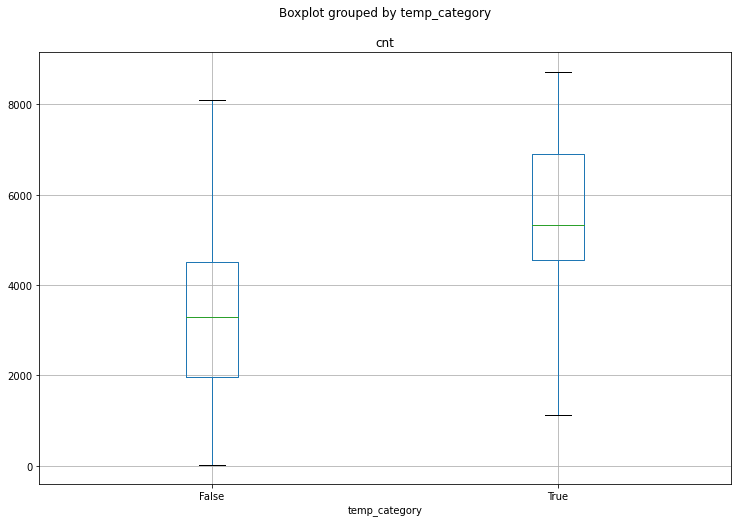

In [31]:
# lets visualize this with a boxplot
bike_sharing_data.boxplot(column=['cnt'], by='temp_category', figsize=(12,8))

In [32]:
# split the data set into two samples
sample_01 = bike_sharing_data[(bike_sharing_data['temp_category'] == True)]
sample_02 = bike_sharing_data[(bike_sharing_data['temp_category'] == False)]

In [33]:
sample_01.shape, sample_02.shape

((367, 8), (364, 8))

In [34]:
# even out sample sizes
sample_01 = sample_01.sample(364)
sample_01.shape, sample_02.shape

((364, 8), (364, 8))

In [35]:
stats.levene(sample_01['cnt'], sample_02['cnt']) # p-value < 0.05, so we must reject the null hypothesis and accept the alternative hypothesis
# the variance is significance

LeveneResult(statistic=4.698048235408265, pvalue=0.030521249921757792)

(array([ 4.,  7., 32., 38., 54., 79., 73., 37., 30., 10.]),
 array([-2.90196784, -2.37456411, -1.84716038, -1.31975665, -0.79235292,
        -0.26494919,  0.26245454,  0.78985827,  1.317262  ,  1.84466573,
         2.37206946]),
 <a list of 10 Patch objects>)

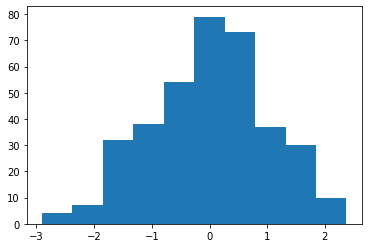

In [36]:
diff = scale(np.array(sample_01['cnt']) - np.array(sample_02['cnt'])) # check distribution of residues between both samples
plt.hist(diff)

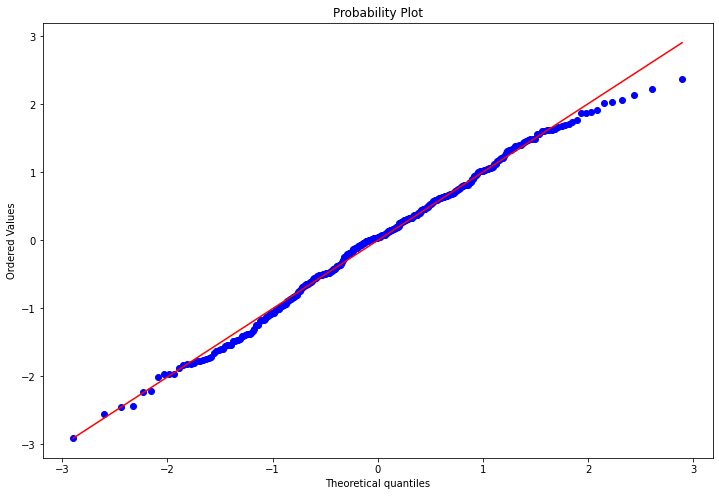

In [37]:
plt.figure(figsize=(12, 8)) # this is a good fit, but falls apart around 2-3 standard deviations from the mean
stats.probplot(diff, plot=plt)
plt.show()

In [38]:
stats.shapiro(diff) # pvalue > 5%

ShapiroResult(statistic=0.9936816096305847, pvalue=0.13314387202262878)

In [39]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt']) # very small p-value, way smaller than 5%, the means are significantly different between hot/cold days

Ttest_indResult(statistic=18.842193512706256, pvalue=8.892900691091523e-65)

In [40]:
descriptives, results = rp.ttest(sample_01['cnt'], sample_02['cnt'], equal_variances=False)

In [41]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,364.0,5604.516484,1475.801459,77.353015,5452.400184,5756.632783
1,cnt,364.0,3387.664835,1691.340133,88.650311,3213.332169,3561.997501
2,combined,728.0,4496.090659,1935.495575,71.734239,4355.259676,4636.921643


In [42]:
print(results) # p-value very close to 0, so a hot day or a cold day has a significant impact on bike rentals

        Satterthwaite t-test    results
0  Difference (cnt - cnt) =   2216.8516
1      Degrees of freedom =    712.9142
2                       t =     18.8422
3   Two side test p value =      0.0000
4  Difference < 0 p value =      1.0000
5  Difference > 0 p value =      0.0000
6               Cohen's d =      1.3967
7               Hedge's g =      1.3952
8          Glass's delta1 =      1.5021
9        Point-Biserial r =      0.5766
